### Imports

In [2]:
pip install seaborn

  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl (251 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.1 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl (63 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 40.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('ggplot')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data = pd.read_csv('dataset_malwares.csv')

In [4]:
data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [6]:
used_data = data.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)

### Classes Distribution

/var/folders/3t/bqggdpq50_d4tsrq_qp1sw980000gn/T/ipykernel_68752/3996734676.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Benign', 'Malware'])


[Text(0, 0, 'Benign'),
 Text(1, 0, 'Malware'),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, ''),
 Text(50, 0, ''),
 Text(51, 0, ''),
 Text(52, 0, ''),
 Text(53, 0, ''),
 Text(54, 0, ''),
 Text(5

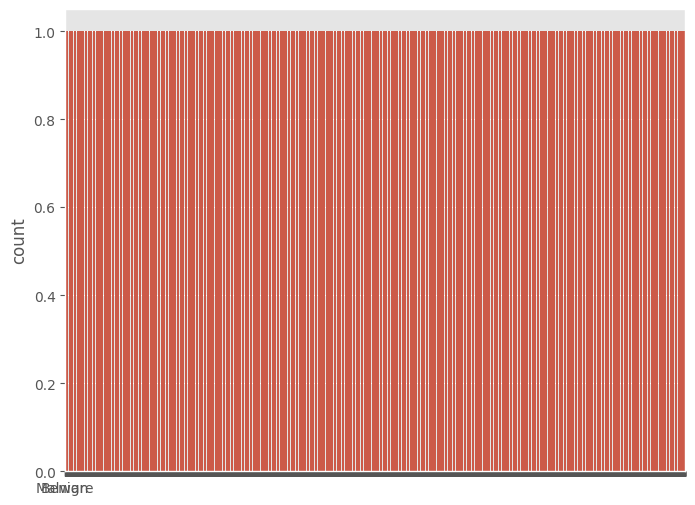

In [17]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(data['Malware'])
ax.set_xticklabels(['Benign', 'Malware'])

### Features visualization

/var/folders/3t/bqggdpq50_d4tsrq_qp1sw980000gn/T/ipykernel_68752/3769893725.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/seaborn/distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/3t/bqggdpq50_d4tsrq_qp1sw980000gn/T/ipykernel_6

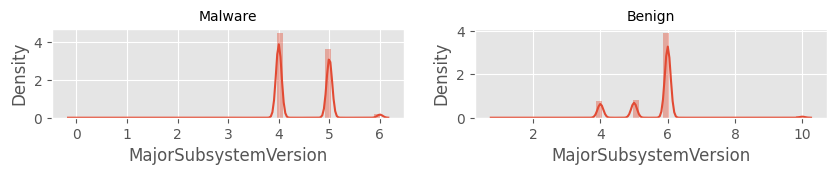

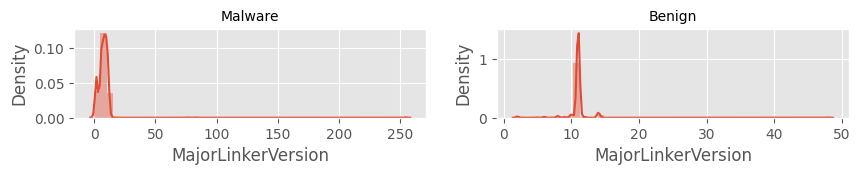

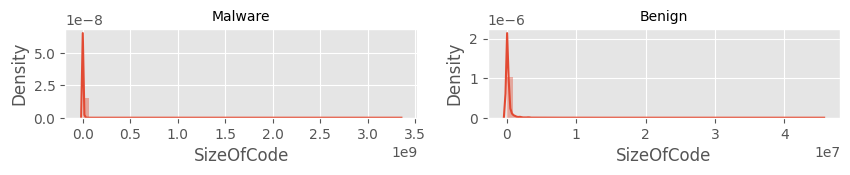

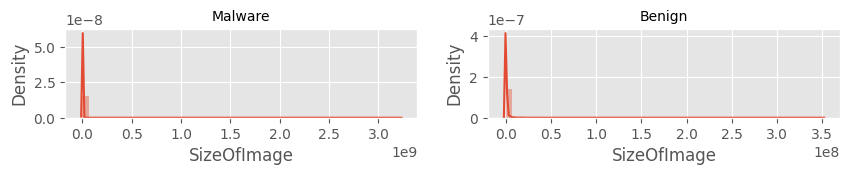

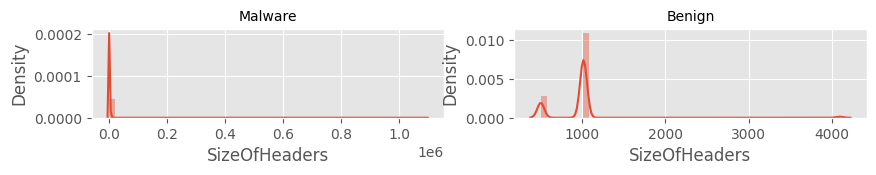

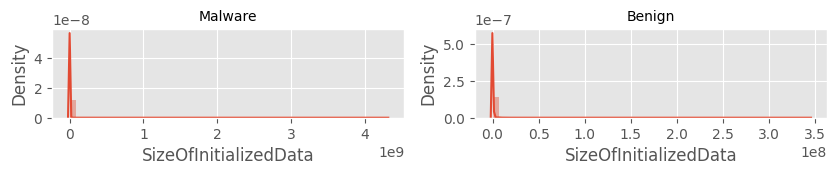

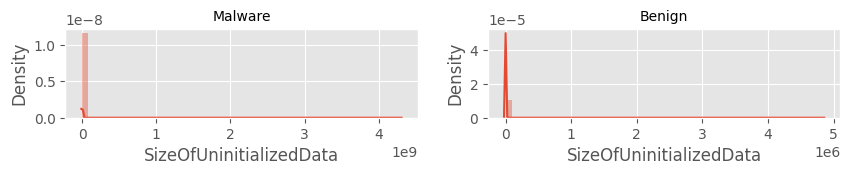

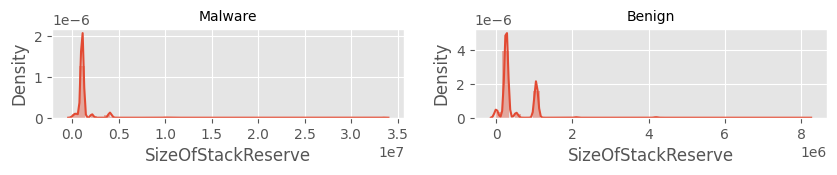

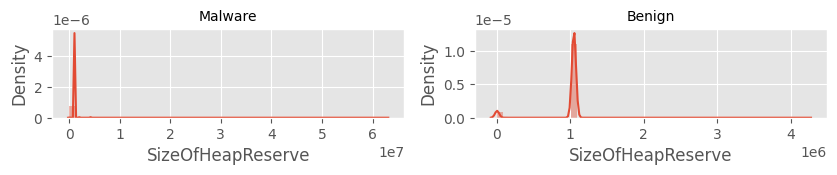

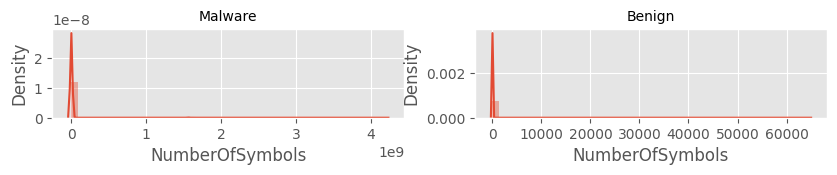

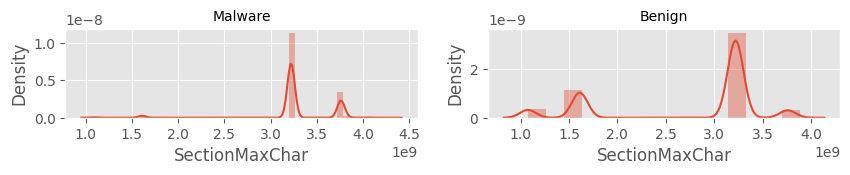

In [8]:
features = ['MajorSubsystemVersion', 'MajorLinkerVersion', 'SizeOfCode', 'SizeOfImage', 'SizeOfHeaders', 'SizeOfInitializedData', 
           'SizeOfUninitializedData', 'SizeOfStackReserve', 'SizeOfHeapReserve', 
            'NumberOfSymbols', 'SectionMaxChar']
i=1

for feature in features:
    plt.figure(figsize=(10, 15))
    ax1 = plt.subplot(len(features), 2, i)
    sns.distplot(data[data['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
    ax1.set_title(f'Malware', fontsize=10)
    ax2 = plt.subplot(len(features), 2, i+1)
    sns.distplot(data[data['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
    ax2.set_title(f'Benign', fontsize=10)
    i= i+2
    

### Splitting the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(used_data, data['Malware'], test_size=0.2, random_state=0)

In [10]:
print(f'Number of used features is {X_train.shape[1]}')

Number of used features is 75


### Building the model

In [11]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

In [12]:
y_pred = rfc.predict(X_test)

#### Classification report

In [13]:
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))


              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97      1004
     Malware       0.99      1.00      0.99      2919

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



#### Confusion matrix

Text(50.722222222222214, 0.5, 'True labels')

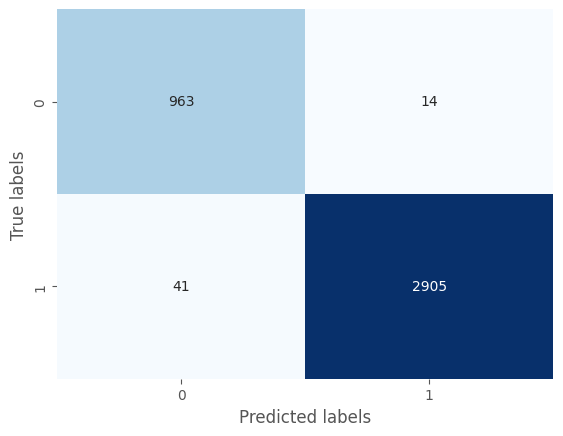

In [14]:
ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

#### Saving model

In [15]:
pkl_filename = "rf_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc, file)

#### Features Importance

/var/folders/3t/bqggdpq50_d4tsrq_qp1sw980000gn/T/ipykernel_68752/1382420665.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')


Text(0.5, 1.0, 'Features importance')

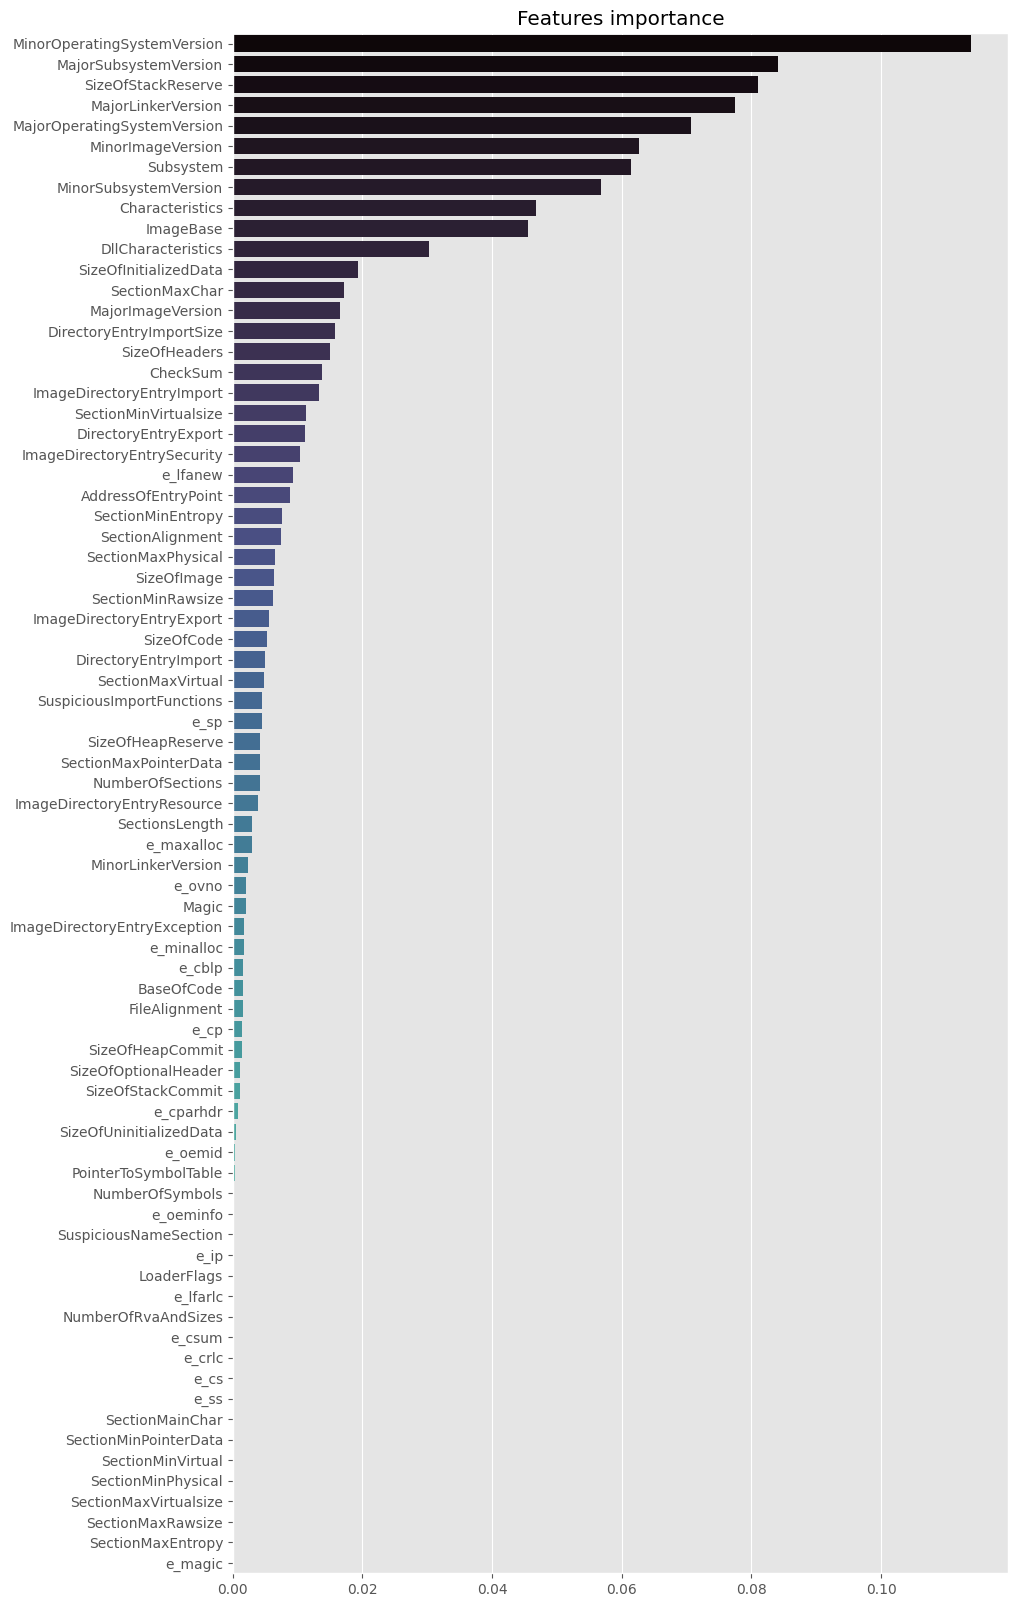

In [16]:
importance = rfc.feature_importances_
importance_dict = {used_data.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')

### Conclusion
- The randomforest model provide very good results without any preprocessing on the data. 
- The reult is good despite the fact that the data is imbalnced. So, I found that we do not need to use any technique to rebalance it.
- Scaling is not nessecry, Random forest model is recursive partitioning model depends on data partition because it works on separation of features values and not make calculations on it. 

In [ ]:
import sklearn
print(sklearn.__version__)